> Import Libraries

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

> Loading Dataset

In [4]:
sales = sales = pd.read_csv('../Data/Data After Milestone 1.csv', encoding='latin-1')
sales.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,...,Ship Mode_Encoded,Segment_Encoded,Market_Encoded,Category_Encoded,Sub-Category_Encoded,Region_Encoded,Season_Encoded,Sales_Lag_1D,Sales_Lag_7D,Sales_Lag_30D
0,2012-07-31,2012-07-31,Same Day,Rick Hansen,Consumer,New York City,New York,United States,US,East,...,1,0,6,2,0,6,2,246.490581,246.490581,246.490581
1,2013-02-05,2013-02-07,Second Class,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,...,2,1,0,0,5,9,3,246.490581,246.490581,246.490581
2,2013-10-17,2013-10-18,First Class,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,...,0,0,0,2,13,9,0,246.490581,246.490581,246.490581
3,2013-01-28,2013-01-30,First Class,Katherine Murray,Home Office,Berlin,Berlin,Germany,EU,Central,...,0,2,4,2,13,3,3,246.490581,246.490581,246.490581
4,2013-11-05,2013-11-06,Same Day,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Africa,Africa,...,1,0,1,2,6,0,0,246.490581,246.490581,246.490581


# 1. Advanced Data Analysis: 

### • Conduct time series analysis to identify trends, seasonality, and cyclic patterns.

### • Use statistical tests (e.g., ADF test for stationarity) to ensure data suitability for time series modeling. 

In [5]:
from statsmodels.tsa.stattools import adfuller

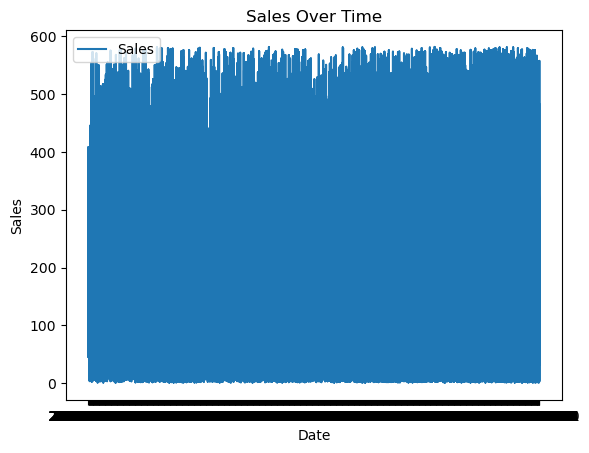

In [6]:
sales = sales.sort_values('Order Date') 
plt.plot(sales['Order Date'], sales['Sales'], label='Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.legend()
plt.show()

In [7]:
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print("ADF Test Results:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")

    if result[1] <= 0.05:
        print("\n The data is stationary (reject null hypothesis).")
    else:
        print("\n The data is non-stationary (fail to reject null hypothesis).")

adf_test(sales['Sales'])


ADF Test Results:
ADF Statistic: -158.66687997814023
p-value: 0.0
Critical Values:
   1%: -3.4304775079418035
   5%: -2.861596355922802
   10%: -2.566799996388417

 The data is stationary (reject null hypothesis).


In [8]:
# Understanding the ADF Test Results
# ADF Statistic: -158.29
# This is the test statistic calculated by the ADF test.
# The more negative this value is, the stronger the evidence that the data is stationary.
#---------------------------------------------------------------------------------------------------
# p-value: 0.0
# The p-value tells us whether to reject or fail to reject the null hypothesis:
# If p-value ≤ 0.05 → Reject the null hypothesis → Data is stationary .
# If p-value > 0.05 → Fail to reject the null hypothesis → Data is non-stationary .
# Since p-value is 0.0, we strongly reject the null hypothesis, confirming that the data is already stationary.
#---------------------------------------------------------------------------------------------------
# Critical Values
# These values help compare the ADF Statistic:
# 1% Level: -3.430
# 5% Level: -2.862
# 10% Level: -2.567
# If the ADF Statistic (-158.29) is lower (more negative) than the critical values, it confirms stationarity.
# In our case, -158.29 is much lower than all critical values, so we confirm stationarity.
# What Does This Mean for our Forecasting?
# Because our data is already stationary, I do NOT need to transform it like differencing or log transformation.

### • Perform correlation analysis to explore the relationships between features such as sales, promotions, holidays, and weather.

# 2. Feature Engineering:

### • Create time series features like rolling averages, lag features, and seasonal components (e.g., holiday effects, month). 

### • Perform feature transformations such as scaling, encoding, and aggregating features (e.g., monthly sales totals). 

### • Introduce external factors like weather, promotions, or economic conditions to improve the forecast accuracy. 